## Цели практической работы

* Изучить и предобработать данные в задаче оттока.

* Научиться применять для решения задачи решающие деревья и оценивать результаты модели.

## Что входит в практическую работу

*  Загрузка и предобработка данных.
*  Применение и настройка линейных моделей.
*  Применение и настройка решающего дерева.
*  Сравнение моделей.
*  Оценка важности признаков.

## Что оценивается

Выполнены все задания ноутбука (заполнены пустые ячейки, даны ответы на вопросы).

## Что нужно сделать
Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("telecom_churn.csv")
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


Сделайте первичную обработку данных:

1. Выбросите колонку State.

2. Колонки International plan и Voice mail plan закодируйте следующим образом: Yes замените на 1, а No на 0.

3. Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [4]:
# ваш код здесь
df_clean = df.drop(columns=['State'])
df_clean['International plan'] = df_clean['International plan'].apply(lambda x: 1 if x=='Yes' else 0)
df_clean['Voice mail plan'] = df_clean['Voice mail plan'].apply(lambda x: 1 if x=='Yes' else 0)
df_clean['Churn'] = df_clean['Churn'].apply(lambda x: 1 if x==True else 0)
df_clean

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [5]:
# ваш код здесь
df_clean.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [9]:
# ваш код здесь
df_x = df_clean.drop(columns=['Churn'])
df_y = df_clean['Churn']

Проверьте баланс классов. Является ли выборка сбалансированной?

In [13]:
# ваш код здесь
print("Всего строк =", df_x.shape[0])
print("Положительный класс =", df_y.sum())
print(f"Классы не сбалансированны, данных о положительном классе меньше в {round((df_x.shape[0]-df_y.sum())/df_y.sum(),1)} раз")

Всего строк = 3333
Положительный класс = 483
Классы не сбалансированны, данных о положительном классе меньше в 5.9 раз


Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [24]:
from sklearn.model_selection import train_test_split

# ваш код здесь
# Испольщую stratify чтобы выборки были так же сбалансированы как исходный массив данных.
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, stratify=df_y, random_state=42)
X_train

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
606,129,415,0,0,0,139.5,119,23.72,289.3,105,24.59,129.4,97,5.82,13.1,8,3.54,0
2468,152,510,1,1,41,146.8,128,24.96,285.6,96,24.28,213.6,80,9.61,4.3,2,1.16,1
1844,77,510,0,1,28,135.9,117,23.10,244.5,102,20.78,207.5,74,9.34,11.5,3,3.11,4
3187,58,408,0,1,39,211.9,40,36.02,274.4,76,23.32,210.5,139,9.47,5.4,4,1.46,1
3083,174,510,0,0,0,235.5,108,40.04,142.3,143,12.10,316.7,131,14.25,12.5,5,3.38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,116,510,0,1,12,221.0,108,37.57,151.0,118,12.84,179.0,80,8.06,9.0,6,2.43,2
2165,160,415,0,0,0,171.2,103,29.10,243.5,121,20.70,178.2,92,8.02,13.0,3,3.51,2
2988,105,415,0,0,0,259.3,96,44.08,175.2,97,14.89,222.4,36,10.01,12.0,5,3.24,3
179,70,408,0,0,0,232.1,122,39.46,292.3,112,24.85,201.2,112,9.05,0.0,0,0.00,3


Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируйте признаки при помощи [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [22]:
from sklearn.preprocessing import StandardScaler

# ваш код здесь
std_scl = StandardScaler()
X_train_std = std_scl.fit_transform(X_train)
X_test_std = std_scl.transform(X_test)
X_train_std

array([[ 0.71072961, -0.5107321 , -0.31860769, ...,  1.44537268,
         1.01225356, -1.20282632],
       [ 1.28536821,  1.75659106,  3.13865621, ..., -1.03104431,
        -2.08997043, -0.43295148],
       [-0.58845332,  1.75659106, -0.31860769, ..., -0.61830814,
         0.45176772,  1.87667306],
       ...,
       [ 0.11110672, -0.5107321 , -0.31860769, ...,  0.20716419,
         0.62121693,  1.10679821],
       [-0.76334332, -0.67779801, -0.31860769, ..., -1.85651664,
        -3.60197876,  1.10679821],
       [-0.51350045, -0.67779801, -0.31860769, ..., -0.20557198,
        -0.25209823,  1.10679821]])

После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведите их снова к pd.DataFrame.

In [27]:
# ваш код здесь
columnns_list = X_train.columns
df_X_train_std = pd.DataFrame(data=X_train_std, columns=columnns_list)
df_X_test_std = pd.DataFrame(data=X_test_std, columns=columnns_list)
df_X_train_std

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0.710730,-0.510732,-0.318608,-0.628757,-0.601437,-0.745204,0.934611,-0.744719,1.720633,0.235871,1.720493,-1.426410,-0.156352,-1.427723,1.009001,1.445373,1.012254,-1.202826
1,1.285368,1.756591,3.138656,1.590440,2.388494,-0.609853,1.383797,-0.609478,1.648204,-0.212733,1.649100,0.263000,-1.027532,0.262096,-2.088041,-1.031044,-2.089970,-0.432951
2,-0.588453,1.756591,-0.318608,1.590440,1.440467,-0.811951,0.834792,-0.812340,0.843651,0.086337,0.843041,0.140608,-1.335008,0.141713,0.445902,-0.618308,0.451768,1.876673
3,-1.063155,-0.677798,-0.318608,1.590440,2.242644,0.597172,-3.008242,0.596788,1.428958,-1.209630,1.428009,0.200801,1.995977,0.199675,-1.700911,-0.205572,-1.698934,-0.432951
4,1.835023,1.756591,-0.318608,-0.628757,-0.601437,1.034742,0.385606,1.035231,-1.156963,2.129976,-1.155986,2.331624,1.586009,2.330897,0.797839,0.207164,0.803701,-1.202826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,0.385934,1.756591,-0.318608,1.590440,0.273665,0.765896,0.385606,0.765839,-0.986657,0.883855,-0.985562,-0.431223,-1.027532,-0.428991,-0.433939,0.619900,-0.434582,0.336923
2329,1.485243,-0.510732,-0.318608,-0.628757,-0.601437,-0.157451,0.136059,-0.157946,0.824076,1.033389,0.824616,-0.447275,-0.412581,-0.446826,0.973807,-0.618308,0.973150,0.336923
2330,0.111107,-0.510732,-0.318608,-0.628757,-0.601437,1.476020,-0.213308,1.475856,-0.512930,-0.162888,-0.513441,0.439565,-3.282352,0.440441,0.621870,0.207164,0.621217,1.106798
2331,-0.763343,-0.677798,-0.318608,-0.628757,-0.601437,0.971702,1.084340,0.971973,1.779360,0.584785,1.780372,0.014203,0.612337,0.012413,-3.601369,-1.856517,-3.601979,1.106798


Обучите на тренировочных данных с параметрами по умолчанию:

1) логистическую регрессию;

2) метод опорных векторов (с kernel='linear').

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# ваш код здесь
logreg = LogisticRegression()
svc_lin = SVC(kernel='linear', probability=True)

logreg.fit(df_X_train_std, y_train)
svc_lin.fit(df_X_train_std, y_train)

print("обучены две модели")

SVC(kernel='linear', probability=True)

С помощью обученных моделей сделайте предсказание на тестовых данных. Вычислите значение метрики roc-auc на тесте. 

Не забудьте, что для корректного вычисления roc-auc необходимо предсказывать не сами классы, а их вероятности (чтобы SVC мог это сделать, при объявлении модели поставьте probability=True).

In [40]:
from sklearn.metrics import roc_auc_score


# ваш код здесь

# Предсказания вероятностей для положительного класса (класс 1)
logreg_pred_prob = logreg.predict_proba(df_X_test_std)[:, 1]
svc_pred_proba = svc_lin.predict_proba(df_X_test_std)[:, 1]


print ("ROC-AUC to LogisticRegression: ", roc_auc_score(y_test, logreg_pred_prob ))
print ("ROC-AUC to SVC(linear): ", roc_auc_score(y_test, svc_pred_proba ))


ROC-AUC to LogisticRegression:  0.8138818310143174
ROC-AUC to SVC(linear):  0.7593385763258721


Теперь обучите решающее дерево с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте и вычислите на тесте roc-auc.

In [167]:
from sklearn.tree import DecisionTreeClassifier

# ваш код здесь

dtree_clsf = DecisionTreeClassifier()
dtree_clsf.fit(df_X_train_std, y_train)

dtree_pred_proba = dtree_clsf.predict_proba(df_X_test_std)[:,1]
print ("ROC-AUC to DecisionTreeClassifier: ", roc_auc_score(y_test, dtree_pred_proba ))

ROC-AUC to DecisionTreeClassifier:  0.8076426698931236


Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.

In [59]:
# ваш код здесь
with_std_roc_auc = roc_auc_score(y_test, dtree_pred_proba)

nnX_train, nnX_test, nnY_train, nnY_test = train_test_split(df_x, df_y, test_size=0.3, stratify=df_y, random_state=42)
dtree_clsf_2 = DecisionTreeClassifier()
dtree_clsf_2.fit(nnX_train, nnY_train)
dtree_pred_proba_2 = dtree_clsf.predict_proba(nnX_test)[:,1]
print("DecisionTreeClassifier")
print("With StandartScaler ROC-AUC score:", with_std_roc_auc)
print ("without StandartScaler ROC-AUC score: ", roc_auc_score(nnY_test, dtree_pred_proba_2 ))

print("\n\nВывод: Масштабирование признаков сильно влияет для модели основанной на древе решений.\nБез Масштабирования модель предсказывает положительный класс с 50% точностью, что соизмеримо с подкидованием монетки.\n\n")


DecisionTreeClassifier
With StandartScaler ROC-AUC score: 0.8237749546279491
without StandartScaler ROC-AUC score:  0.5


Вывод: Масштабирование признаков сильно влияет для модели основанной на древе решений.
Без Масштабирования модель предсказывает положительный класс с 50% точностью, что соизмеримо с подкидованием монетки.




Какой вывод про масштабирование признаков для обучения дерева можно сделать?

Теперь ваша цель — максимально улучшить модели. Для этого:

1) у линейных моделей подберите гиперпараметр С (переберите 20 значений C в диапазоне от 0.1 до 10 с равным шагом);

2) у решающего дерева подберите max_depth (переберите глубину от 1 до 10 с шагом 1) и criterion — gini или entropy (см. [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

Для подбора параметров используйте [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) с пятью фолдами и метрикой roc-auc или обычные циклы.

Подбор параметров осуществляется только по тренировочным данным!

После подбора гиперпараметров обучите модели с найденными гиперпараметрами на тренировочных данных, сделайте предсказания на тесте и оцените их качество (roc_auc).

In [81]:
from sklearn.model_selection import GridSearchCV

# ваш код здесь
print("LogisticRegression:")
lreg_m = LogisticRegression()
param_grid = {
    'C': np.arange(0.1, 10, 0.5),         # Коэффициент регуляризации
    'penalty': ['l2'],  # Тип регуляризации
    'class_weight': ['balanced', None],
    'max_iter': [1000, 3000, 4000]                  # Количество итераций
       
}


gs_lreg = GridSearchCV(
    lreg_m, 
    param_grid,
    cv=5,        # Количество фолдов для кросс-валидации
    scoring='roc_auc', # Метрика для оптимизации (можно использовать и 'accuracy' или другие)
    n_jobs=-1    # Использовать все доступные процессоры
)

gs_lreg.fit(df_X_train_std, y_train)
print(f'Best Parameters: {gs_lreg.best_params_}')
print(f'Best ROC-AUC Score: {gs_lreg.best_score_}')

lreg_m.set_params(**gs_lreg.best_params_)
lreg_m.fit(df_X_train_std, y_train)
lreg_predict_proba = lreg_m.predict_proba(df_X_test_std)[:, 1]
print ("Tunned LogisticRegression ROC-AUC: ", roc_auc_score(y_test, lreg_predict_proba ))

LogisticRegression:
Best Parameters: {'C': 2.1, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l2'}
Best ROC-AUC Score: 0.8150212009391344
Tunned LogisticRegression ROC-AUC:  0.8168017745513209


In [102]:
print("DecisionTreeClassifier")

tunned_dtree = DecisionTreeClassifier()

param_grid = {
    'max_depth': np.arange(1, 10, 1),
    'class_weight': ['balanced', None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': np.arange(2,20,2),
    'max_features': ['sqrt', 'log2']#np.arange(1, 100, 25)
}

gs_dtree = GridSearchCV(
    tunned_dtree,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

gs_dtree.fit(df_X_train_std, y_train)
print(f'Best Parameters: {gs_dtree.best_params_}')
print(f'Best ROC-AUC Score: {gs_dtree.best_score_}')

tunned_dtree.set_params(**gs_dtree.best_params_)
tunned_dtree.fit(df_X_train_std, y_train)
tunned_dtree_predict_proba = tunned_dtree.predict_proba(df_X_test_std)[:, 1]
print ("Tunned DecisionTreeClassifier ROC-AUC: ", roc_auc_score(y_test, tunned_dtree_predict_proba ))

print("Лучшая модель: DecisionTreeClassifier")

DecisionTreeClassifier
Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_split': 18}
Best ROC-AUC Score: 0.8623046862106978
Tunned DecisionTreeClassifier ROC-AUC:  0.8848921153458359


Какая модель справилась с решением задачи лучше всего по метрике roc-auc?

Нарисуйте roc-кривую для наилучшей модели.

In [103]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

# ваш код здесь

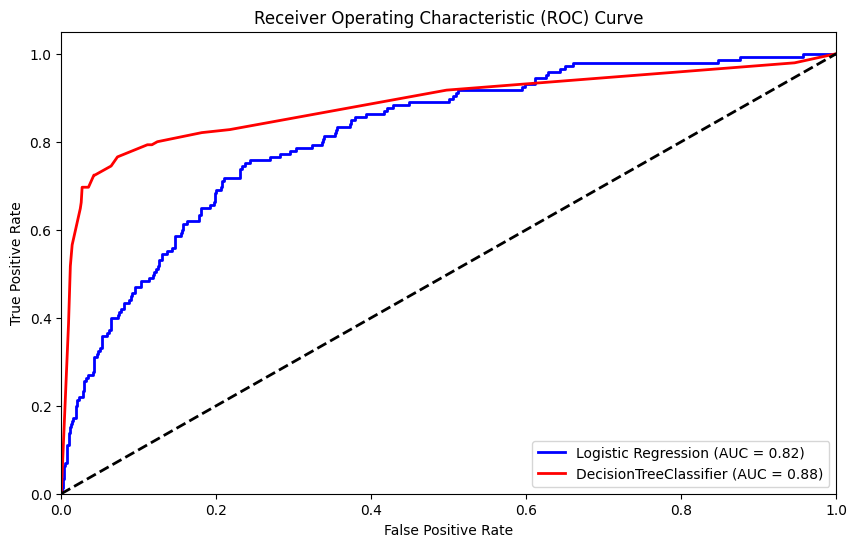

In [108]:


# Вычисляем ROC-кривую и AUC для логистической регрессии
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, lreg_predict_proba)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Вычисляем ROC-кривую и AUC для DecisionTreeClassifier
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, tunned_dtree_predict_proba)
roc_auc_dtree = auc(fpr_dtree, tpr_dtree)

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_dtree, tpr_dtree, color='red', lw=2, label=f'DecisionTreeClassifier (AUC = {roc_auc_dtree:.2f})')

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')  # Линия случайных угадываний
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Сравните между собой две лучшие модели:

1. Насколько сильно отличается качество предсказания на тестовых данных?
(Вычислите разность значений roc-auc.)

2. Постройте гистограммы важности признаков (для линейных моделей берите модуль значений весов) для каждой из этих моделей. Сравните между собой списки из трёх самых важных признаков. Совпадают ли они?

In [111]:
# ваш код здесь
print("Разницы между показателями метрики ROC-AUC у LogReg и DTree:", roc_auc_dtree - roc_auc_logreg)


Разницы между показателями метрики ROC-AUC у LogReg и DTree: 0.06809034079451504


In [162]:
# ваш код здесь


def show_importance(features, importance, model_name: str, color: str):
    # Создаем DataFrame из признаков и их важности
    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': importance})
    
    # Сортируем по убыванию важности
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    # Визуализируем
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color=color)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(model_name+' Feature Importance')
    plt.gca().invert_yaxis()  # Перевернуть ось Y для отображения самых важных признаков сверху
    plt.show()



LogisticRegression


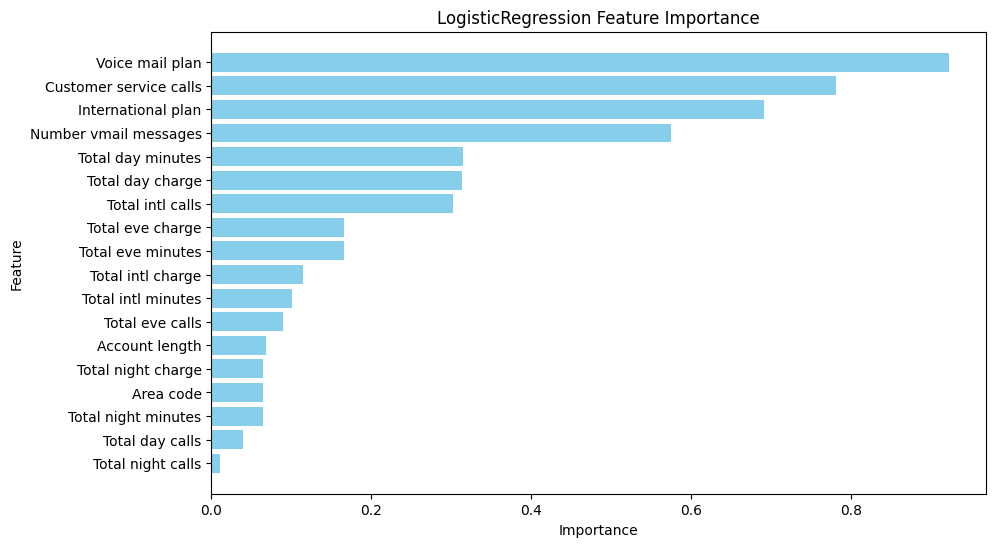

DecisionTreeClassifier


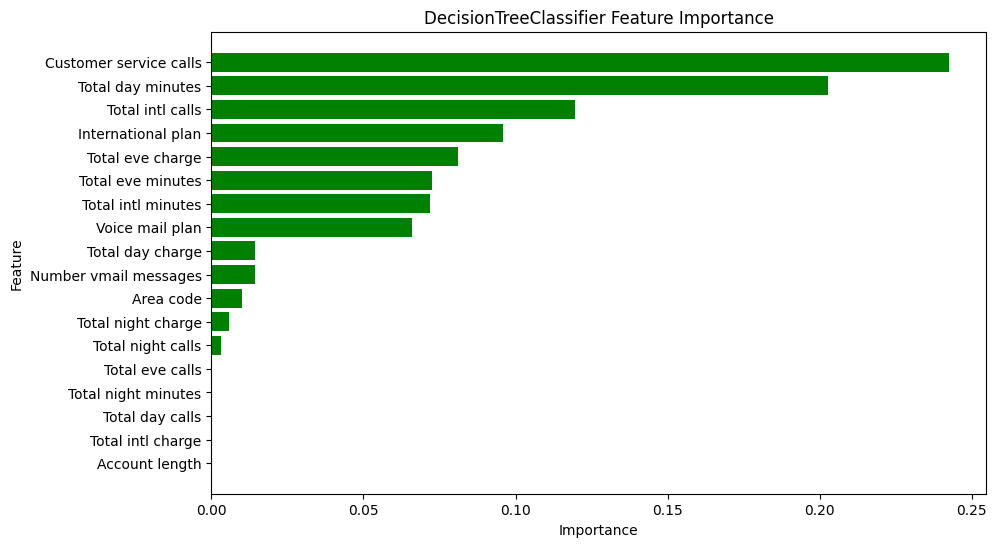

In [163]:
features = df_X_train_std.columns

logreg_importance = np.abs(lreg_m.coef_).flatten()
print("LogisticRegression")
show_importance(features, logreg_importance, 'LogisticRegression', 'skyblue')

print("DecisionTreeClassifier")
dtree_importance = tunned_dtree.feature_importances_
show_importance(features, dtree_importance, 'DecisionTreeClassifier', 'green')

In [165]:
# ваш код здесь
print("Сравните между собой списки из трёх самых важных признаков. Совпадают ли они?")
print("ТОП3 важнейщих признаков в моделях не совпадают, \nтак же заметно что в моделе древа решений некоторые фитчи не влияют на предсказания их можно будет удалить для оптимизации скорости")


Сравните между собой списки из трёх самых важных признаков. Совпадают ли они?
ТОП3 важнейщих признаков в моделях не совпадают, 
так же заметно что в моделе древа решений некоторые фитчи не влияют на предсказания их можно будет удалить для оптимизации скорости


Сделайте выводы:

1. Являются ли данные сбалансированными? Что это означает?

2. Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc?

3. Одинаковые ли признаки важны для работы двух наилучших моделей? Почему?

1. Являются ли данные сбалансированными? Что это означает?
   <p>Данные не сбалансированны, данных о положительном классе меньше в 5.9 раз</p>
   
2. Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc?
   <p>DecisionTreeClassifier после тюнинга справляется лучше, разница с LogisticRegression 0.06</p>

3. Одинаковые ли признаки важны для работы двух наилучших моделей? Почему?
<p>Нет не одинаковые признаки, отличия обусловленны методами классификации. Что обусловлено используемыми методами классификации. Деревья решений способны выявлять нелинейные связи между признаками, тогда как линейная регрессия основывается исключительно на линейных зависимостях.</p>

In [1]:
from sklearn.metrics import roc_auc_score

# Преобразованные метки классов и предсказанные вероятности
true_labels = [1, 0, 0, 0]
predicted_probs = [0.8, 0.9, 0.5, 0.2]

# Вычисление ROC-AUC
roc_auc = roc_auc_score(true_labels, predicted_probs)
roc_auc


0.6666666666666667